# Introduction to Time Series: Lomb Scargle Periodograms I

Sarah Blunt, CIERA/Northwestern

Presented at LSST Discovery Alliance Data Science Fellowship Program Session 20: Time Series

This lesson draws heavily from Jake van der Plas' excellent paper, "Underrstanding the Lomb-Scargle Periodogram," and all figures are taken directly
from that paper unless otherwise noted. 

https://arxiv.org/abs/1703.09824

#### Goals for this Lesson:
By the end of this lesson, you will be able to:
- explain the purpose of the Lomb-Scargle periodogram
- explain the difference between the Fourier transform and the PSD
- reason about the effect of a window function on an observed signal in the time and frequency domains
- identify common astronomical patterns in real window functions

### I: Motivation
(10 mins)

The Fourier transform is defined for continuous data with a known functional form. However, real data are messy, and we usually don't know the underlying functional form. Let's take a look at an example of a real dataset we might want to analyze and identify some problems we might run into constucting a power spectrum.

![data-example](data-and-images/vanderPlas-fig1.jpg)

What are some problems you notice?
- Discrete samples (i.e. not continuous)
- Non-uniform sampling
- Error bars exist
- The error bars are different sizes
- There are big gaps in the data
- The gaps themselves are somewhat periodic (day/night, and also when the object is visible in the sky)

The Lomb-Scargle (LS) periodogram provides a framework for analyzing datasets like this one. However, it's not a perfect tool! The more you understand about how it works, the less likely you will be to misinterpret a LS periodogram. 

Why are we choosing to focus on the Lomb-Scargle periodogram? There are many, many other methods for detecting periodicity in "real" data, which broadly fall into the following categories:
- Fourier methods, which are derived from the Fourier transform
- Phase-folding methods
- Least-squares methods, and
- Bayesian methods

These are not really separate categories; for example, one can construct a probability function using a phase-folding or least-squares method, then incorporate it into a Bayesian analysis. There are two main reasons that we are devoting so much time to the LS periodogram:

Reason #1: It's super popular! You are very likely to encounter the LS periogoram in time-series analysis, so it's important to have a solid understanding.

Reason #2: It is related to all four "classes" of methods above. It can be derived from Fourier theory (which we will show), and can also be viewed as a least-squares method (which we will also show). We won't discuss this, but it can also be derived from Bayesian probability theory and is closely related to phase-folding techniques. Therefore, gaining intuition about the LS periodogram will help you understand many of these methods, and give you a baseline for understanding other techniques.

### II: Brief Review of the Continuous Fourier Transform
(15 mins)

We will derive the LS periodogram from Fourier analysis, so let's briefly restate some necessary background.

Let's begin by motivating the power spectral density (PSD). As it turns out, the LS periodogram is an estimator of the PSD, so it is important to understand why we would like to estimate the PSD in the first place. 

#### The Power Spectral Density (PSD)

The Fourier transform of a periodic cosine function is:

$$
\mathcal{F}\left\{\cos \left(2 \pi f_0 t\right)\right\}=\frac{1}{2}\left[\delta\left(f-f_0\right)+\delta\left(f+f_0\right)\right]
$$

In words, the Fourier transform of a periodic function is the sum of two delta functions: one centered at $-f_0$ and one at $+f_0$. The Fourier transform of a periodic sine function, on the other hand, is:

$$
\mathcal{F}\left\{\sin \left(2 \pi f_0 t\right)\right\}=\frac{1}{2i}\left[\delta\left(f-f_0\right)-\delta\left(f+f_0\right)\right],
$$

which is actually just $\mathcal{F}\left\{\cos \left(2 \pi f_0 t\right)\right\}$ multiplied by $e^{-2\pi i f (\pi/2)}$. Notice that $\mathcal{F}\left\{\cos \left(2 \pi f_0 t\right)\right\}$ is purely real, and $\mathcal{F}\left\{\sin \left(2 \pi f_0 t\right)\right\}$ is purely imaginary. 

This motivates the definition of the power spectral density (PSD), which is the **squared magnitude of the Fourier transform**:

$$
\mathcal{P}_g \equiv|\mathcal{F}\{g\}|^2
$$

While the Fourier transform is a complex number (part real and part imaginary), the PSD is a *real, positive number*. It retains useful properties of the Fourier transform, while being insensitive to time shifts. In other words, while $\mathcal{F}\left\{\cos \left(2 \pi f_0 t\right)\right\}$ and $\mathcal{F}\left\{\sin \left(2 \pi f_0 t\right)\right\}$ have different Fourier transforms, they have the same PSD. This allows you to use the PSD to identify the frequencies making up a signal without worrying about the time-shift.

### The Convolution Theorem
As Bryan discussed, **convolution** in the time domain is the same as a pointwise product in the frequency domain (this is called the "convolution theorem"). Convolution is a mathematical operation (like addition or multiplication) that operates on two functions: it acts to "slide" one past the other. Understanding convolution (and the Fourier equivalence) will be immensely helpful in understanding what sampling does to a signal, so let's look at some visual representations of convolution and the convolution theorem.

Here's the mathematical definition of the convolution of a function $f$ with a function $g$:

$[f * g](t) \equiv \int_{-\infty}^{\infty} f(\tau) g(t-\tau) d \tau$

And here is the convolution theorem:

$\mathcal{F}\{f * g\}=\mathcal{F}\{f\} \cdot \mathcal{F}\{g\}$

Here's a visualization of what the convolution operation looks like:

![data-example](data-and-images/vanderPlas-fig4.jpg)

And here's an example of what the convolution theorem looks like. On the left, the black and grey curves represent the real and imaginary parts of the Fourier transforms (respectively).

![data-example](data-and-images/vanderPlas-fig5.jpeg)

### III: The Effect of a Uniform Observing Window
(10 mins)

When we observe a continuous signal, we can reason through what happens to the Fourier transform by thinking of making a pointwise product of the true signal with the observing cadence. Thus, the Fourier transform of our observed signal is the *convolution* of the Fourier transforms of the signal itself *and* the observing window. As a first example, consider observing a a continuous signal for a finite time:

![data-example](data-and-images/vanderPlas-fig6.jpg)

Next, consider observing a continuous example at N equally spaced times (delta functions), forever:

![data-example](data-and-images/vanderPlas-fig7.jpg)

In astronomy, (if we're lucky!) we get an observing window (often called a window function) that looks like the pointwise product of both of these effects: a finite window over which we observe (say, from dusk until dawn), and several instantaneous equally spaced observations over the course of the night. We're getting closer to approximating real observing conditions, but we still have a ways to go. 

Side note: this line of reasoning allows you to derive the *discrete* Fourier transform. 

### IV: The Effect of Nonuniform Sampling
(5 mins)

The Fourier transform of random noise is random noise. Ergo, if you make measurements at random times, the Fourier transform of your window function will appear random. Observe: 

![data-example](data-and-images/vanderPlas-fig9.jpg)

Imagine you're looking at the bottom panel only and trying to reconstruct the signal. What could you do to improve the reconstruction?
- increase sampling cadence!

![data-example](data-and-images/vanderPlas-fig10.jpg)

There are still "imperfections" that are characteristic of random sampling, in particular "noisy-ness" in the observed Fourier transform. However, densely sampling the signal does, as expected, produce a Fourier transform much closer to the true signal.

### V: The Effect of Semistructured Observing Windows
(10 mins)

Many astronomical observations are neither uniform nor nonuniform, but a secret third thing: semi-uniform. This means that there are periodic patterns in your data, but there's randomness on top of them. For example, when observing from the ground, you can only see stars during the night. However, during the time a star is visible, you might observe uniformly. So, your data will have some periodic structure, but also randomness! Let's take a look at how some of these patterns manifest in real data.

Here is an example of a real window function from a ground-based observing campaign. What do you notice? How do you explain each signal?

![data-example](data-and-images/vanderPlas-fig13.jpg)

- strong peak at 1 day: only observing at night
- strong peaks at 1/N days: separation between observations within the night
- peak at 14 days: probably related to scheduling
- peak at 365 days: star is only up in the sky certain times of year

Now, let's take a look at how this window function is imprinted on real periodic data. The signal being convolved with this window function has a single major frequency at 2.58 hours = 0.1075 days (frequency 9.30 d^-1):

![data-example](data-and-images/vanderPlas-fig14.jpg)

Think-pair-share: why are these symmetric peaks on either side of the main frequency?

## Problems:

Prioritize questions 1-4, and if you have extra time go on to question 5. If you finish all of them, work on a cool visualization of the convolution theorem so I can use it in my lesson in the future! :D

1. I had to include one derivation question lol.

   a. Show that the PSD of an arbitrary function does not change if it is shifted in time. Hint: Plug the equation for a time-shifted function, $f(t - \tau)$ into the definition of the Fourier transform, then make the substitution $t_0$ = $t$ + $\tau$.

   b. Write a sentence about why this result is important for time series analysis.

2. You've heard of chi-by-eye? You're about to convolve by eye... Mind. Blown.

   a. In Python, plot the sum of a few arbitrary sinusoids between 0 and 1. 

   b. What would your function look like when convolved with a top hat function? How about a Gaussian? Without coding up the answer, draw what you expect for each case. 
   
   c. Check your expectation by coding and plotting the convolution (you can use numpy.convolve). How does this change when you make the top hat or Gaussian width smaller?

3. Make your own realistic observing conditions! Who needs telescopes?

   a. In Python, generate some uniform random observation times spanning 1 year, and sample a sinusoid with a period of 10 hours at these observation times. I recommend generating 10,000 data points.

   b. Plot the Lomb Scargle periodogram of your data (use the `autopower()` functionality of `astropy.timeseries.LombScargle`). Write a sentence explaining the structure you see.
   
   c. Mask out data during the hours of 12am to 12pm, and plot the new Lomb Scargle periodogram. Write a sentence explaining the new structure you see.
   
   d. Given a quasi-uniform sampling frequency $f_{0}$ and a signal frequency $f$, what are the frequencies of the aliases you will observe?

4. In part III, we discussed two effects of real observing: the effect of a finite observation window, and the effect of a sequence of equally-spaced observations. Sketch the effect (literally draw, don't use Python) of both of these effects on an observation of a cosine function:

   a. Draw the cosine function in the time domain and the Fourier domain. 

   b. Draw the window function of a finite number of equally spaced observations.
   
   c. Draw the observed signal and its Fourier transform. 

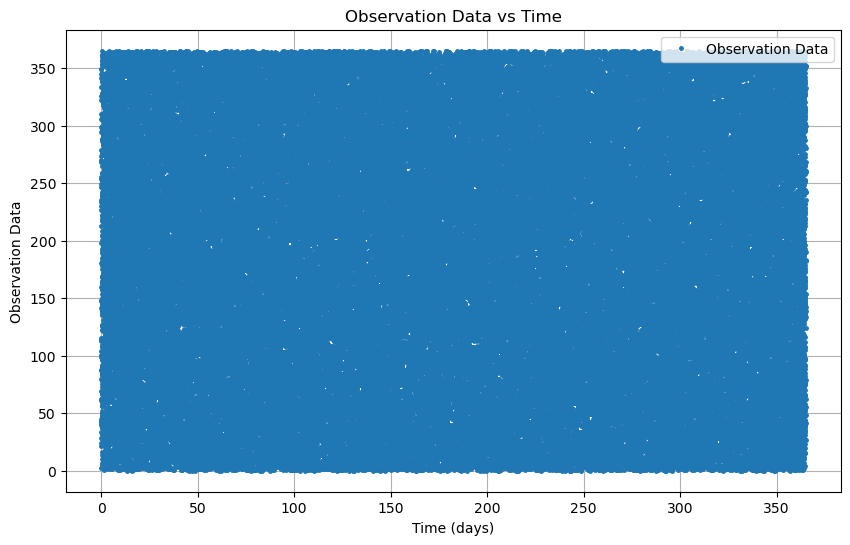

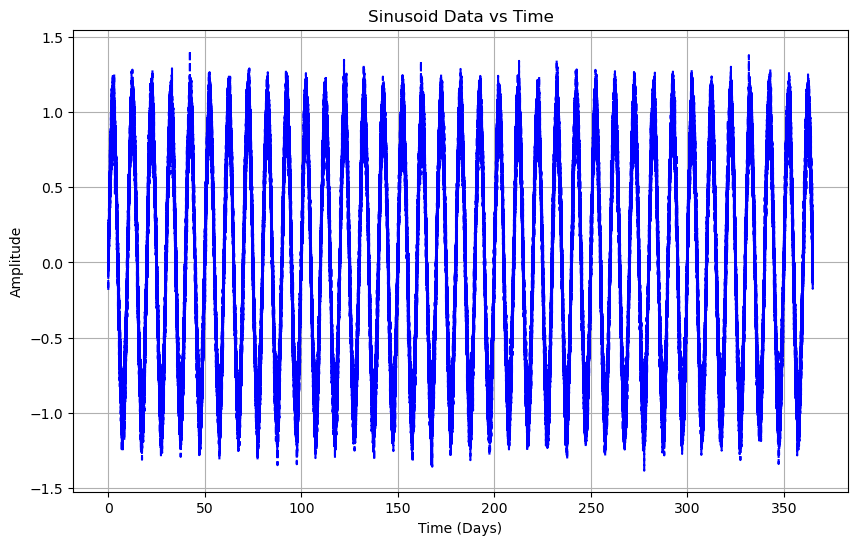

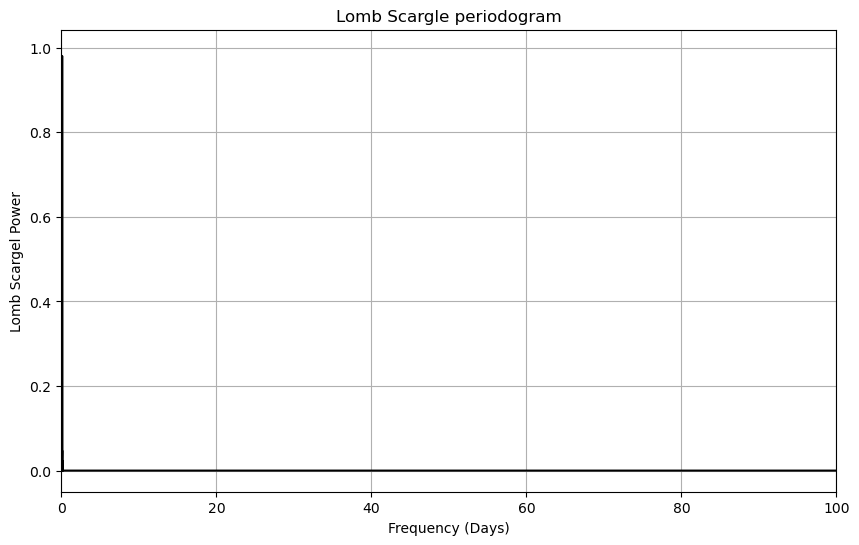

In [35]:
# problem3

import numpy as np 
import matplotlib.pyplot as plt 
import scipy.fft as fft
import scipy.stats as stats
from astropy.timeseries import LombScargle
import astropy.units as u

# Generate uniform random observation time spanning 1 year
start_time = 0  # Start time (in days)
end_time = 365  # End time (in days), 1 year = 365 days
num_observations = 100000  # the number of observation times
observation_times = np.linspace(start_time, end_time, num_observations)
rand = np.random.default_rng(42)
observation_data = np.random.uniform(start_time, end_time, num_observations) # Generate uniform random observation times


plt.figure(figsize=(10, 6))
plt.plot(observation_times, observation_data, marker='.', linestyle='', markersize=5, label='Observation Data')
plt.xlabel('Time (days)')
plt.ylabel('Observation Data')
plt.title('Observation Data vs Time')
plt.grid(True)
plt.legend()
plt.show()

# Sample a sinusoid with a period of 10 hours at these observation times (recommend generating 10,000 data points)
amplitude = 1  # Amplitude of the sinusoid
period = 10  # hours
sinusoid_data = amplitude * np.sin(2*np.pi/period * observation_times)
noise = 0.1 * rand.standard_normal(num_observations)

sinusoid_data_error = sinusoid_data + noise

plt.figure(figsize=(10, 6))
plt.plot(observation_times, sinusoid_data, linestyle='-', color='black')
# plt.hold
plt.plot(observation_times, sinusoid_data_error, linestyle='--', color='blue')
plt.xlabel('Time (Days)')
plt.ylabel('Amplitude')
plt.title('Sinusoid Data vs Time')
plt.grid(True)
plt.show()


# Plot the Lomb Scargle periodogram of your data 
# (use the autopower() functionality of astropy.timeseries.LombScargle)
frequency, power = LombScargle(observation_times, sinusoid_data_error).autopower()
plt.figure(figsize=(10, 6))
plt.plot(frequency, power, linestyle='-', color='black')
plt.xlabel('Frequency (Days)')
plt.ylabel('Lomb Scargel Power')
plt.title('Lomb Scargle periodogram')
plt.xlim([0,100])
plt.grid(True)
plt.show()


# Mask out data during the hours of 12am to 12pm, and plot the new Lomb Scargle periodogram


